## Install [FastText](https://fasttext.cc/docs/en/supervised-tutorial.html)

In [1]:
!wget https://github.com/facebookresearch/fastText/archive/0.2.0.zip
!unzip 0.2.0.zip
%cd fastText-0.2.0
!make

--2019-08-05 15:50:20--  https://github.com/facebookresearch/fastText/archive/0.2.0.zip
正在解析主机 github.com (github.com)... 13.229.188.59
正在连接 github.com (github.com)|13.229.188.59|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 302 Found
位置：https://codeload.github.com/facebookresearch/fastText/zip/0.2.0 [跟随至新的 URL]
--2019-08-05 15:50:20--  https://codeload.github.com/facebookresearch/fastText/zip/0.2.0
正在解析主机 codeload.github.com (codeload.github.com)... 54.251.140.56
正在连接 codeload.github.com (codeload.github.com)|54.251.140.56|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：未指定 [application/zip]
正在保存至: “0.2.0.zip”

0.2.0.zip               [             <=>    ]   4.10M  1.36MB/s    in 3.0s    

2019-08-05 15:50:24 (1.36 MB/s) - “0.2.0.zip” 已保存 [4304799]

Archive:  0.2.0.zip
7842495a4d64c7a3bb4339d45d6e64321d002ed8
   creating: fastText-0.2.0/
   creating: fastText-0.2.0/.circleci/
  inflating: fastText-0.2.0/.circleci/cmake_test.sh  
  inflating: fastText-0.2.0/.circleci/config.yml  
  inflating: fastT

  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_1.js  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_10.html  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_10.js  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_11.html  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_11.js  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_12.html  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_12.js  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_13.html  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_13.js  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_2.html  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_2.js  
  inflating: fastText-0.2.0/website/static/docs/en/html/search/variables_3.html  
  inflating: fastTex

src/fasttext.cc: In member function ‘void fasttext::FastText::lazyComputeWordVectors()’:
src/fasttext.cc:531:5: warning: ‘void fasttext::FastText::precomputeWordVectors(fasttext::Matrix&)’ is deprecated: precomputeWordVectors is being deprecated. [-Wdeprecated-declarations]
     precomputeWordVectors(*wordVectors_);
     ^~~~~~~~~~~~~~~~~~~~~
src/fasttext.cc:514:6: note: declared here
 void FastText::precomputeWordVectors(Matrix& wordVectors) {
      ^~~~~~~~
src/fasttext.cc:531:40: warning: ‘void fasttext::FastText::precomputeWordVectors(fasttext::Matrix&)’ is deprecated: precomputeWordVectors is being deprecated. [-Wdeprecated-declarations]
     precomputeWordVectors(*wordVectors_);
                                        ^
src/fasttext.cc:514:6: note: declared here
 void FastText::precomputeWordVectors(Matrix& wordVectors) {
      ^~~~~~~~
src/fasttext.cc: In member function ‘void fasttext::FastText::trainThread(int32_t)’:
src/fasttext.cc:650:7: warning: ‘void fasttext::FastText::su

## Make simple dataset

In [2]:
# 1 is positive, 0 is negative
f = open('train.txt', 'w')
f.write('__label__1 i love you\n')
f.write('__label__1 he loves me\n')
f.write('__label__1 she likes baseball\n')
f.write('__label__0 i hate you\n')
f.write('__label__0 sorry for that\n')
f.write('__label__0 this is awful')
f.close()

f = open('test.txt', 'w')
f.write('sorry hate you')
f.close()

## Training

In [3]:
!./fasttext supervised -input train.txt -output model -dim 2

Read 0M words
Number of words:  17
Number of labels: 2
Progress: 100.0% words/sec/thread:   45203 lr:  0.000000 loss:  0.643659 ETA:   0h 0m


## Predict

In [4]:
!cat test.txt
!./fasttext predict model.bin test.txt

sorry hate you__label__0


In [6]:
f = open("./model.vec","r")

In [7]:
lines = f.readlines()
print(lines)

['17 2\n', '</s> -0.46332 0.34728 \n', 'i -0.28741 -0.10132 \n', 'you 0.25966 0.06002 \n', 'awful 0.36357 0.066328 \n', 'is 0.55131 0.52123 \n', 'this -0.017722 0.20373 \n', 'that 0.50371 0.38254 \n', 'for -0.1638 -0.058931 \n', 'sorry 0.051158 0.31621 \n', 'hate 0.095313 -0.37286 \n', 'baseball -0.12541 0.31045 \n', 'likes 0.21518 -0.34261 \n', 'she 0.22835 -0.35313 \n', 'me 0.026958 -0.22354 \n', 'loves -0.1402 0.45464 \n', 'he -0.38378 -0.20282 \n', 'love -0.45805 -0.35936 \n']


In [8]:
lines = lines[1:]
print(lines)

['</s> -0.46332 0.34728 \n', 'i -0.28741 -0.10132 \n', 'you 0.25966 0.06002 \n', 'awful 0.36357 0.066328 \n', 'is 0.55131 0.52123 \n', 'this -0.017722 0.20373 \n', 'that 0.50371 0.38254 \n', 'for -0.1638 -0.058931 \n', 'sorry 0.051158 0.31621 \n', 'hate 0.095313 -0.37286 \n', 'baseball -0.12541 0.31045 \n', 'likes 0.21518 -0.34261 \n', 'she 0.22835 -0.35313 \n', 'me 0.026958 -0.22354 \n', 'loves -0.1402 0.45464 \n', 'he -0.38378 -0.20282 \n', 'love -0.45805 -0.35936 \n']


In [10]:
for line in lines:
    label, x, y = line.split()
    print(label, x, y)

</s> -0.46332 0.34728
i -0.28741 -0.10132
you 0.25966 0.06002
awful 0.36357 0.066328
is 0.55131 0.52123
this -0.017722 0.20373
that 0.50371 0.38254
for -0.1638 -0.058931
sorry 0.051158 0.31621
hate 0.095313 -0.37286
baseball -0.12541 0.31045
likes 0.21518 -0.34261
she 0.22835 -0.35313
me 0.026958 -0.22354
loves -0.1402 0.45464
he -0.38378 -0.20282
love -0.45805 -0.35936


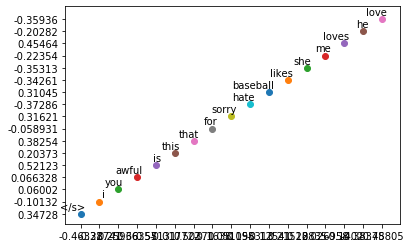

In [17]:
import matplotlib.pyplot as plt

for line in lines:
    label, x, y = line.split()
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.show()